# Specific Heat of Solids

In [1]:
import numpy as np # import the numpy library as the "np" handle. Many numerical functions "resides" in numpy
import scipy.integrate as spi
import matplotlib as mpl
import matplotlib.pyplot as plt # import the "pyplot" library as the "plt" handle

mpl.rcParams['figure.figsize'] = (14,10)
mpl.rcParams['font.size'] = 20
mpl.rcParams['legend.fontsize'] = 20

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Definition of specific heat: Model 1

$$ C = 3 R \min \left[ \frac{4\pi^4}{5} \left( \frac{T}{T_D}\right)^3, 1 \right] $$

In [2]:
def specificHeatModelOne(temperature, debyeTemperature=373):
    '''
    simple model for specific heat of a solid
    
    Returns the molar specific heat in J/mol.K as
    as a function of the temperature (in Kelvin)
    The Debye temperature of the solid can be provided (in Kelvin)
    otherwise it is assumed to be 100 K
    '''
    R = 8.31 # molar constant in J/mol.K
    
    constant= 4*np.pi**4/5
    
    value = constant*(temperature/debyeTemperature)**3
    
    # the value should not exceed 1
    if (value> 1):
        value = 1
        
    specificHeat = 3*R*value
    
    return specificHeat

## Definition of specific heat: Model 2

$$ C_n=3 R \left[\frac{3}{x_D^3} \int_0^{x_D} \frac{ x^4  e^x}{(e^x-1)^2} dx \right] $$

In [3]:
def specificHeatModelTwo(temperature, debyeTemperature=100):
    '''
    model for specific heat of a solid
    
    Returns the molar specific heat in J/mol.K as
    as a function of the temperature (in Kelvin)
    The Debye temperature of the solid can be provided (in Kelvin)
    otherwise it is assumed to be 100 K
    '''
    
    xD=debyeTemperature/temperature
    
    def integrand(x):
        y=x**4*np.exp(x)/(np.exp(x)-1)**2
        return y
     
    integral=spi.quad(integrand,0,xD)
    
    R = 8.31 # molar constant in J/mol.K
    specificHeat = 9*R/(xD**3)*integral[0] 
    
    return specificHeat

## Plotting

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/ipykernel/__main__.py:14: RuntimeWarning: overflow encountered in double_scalars
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/ipykernel/__main__.py:14: RuntimeWarning: overflow encountered in exp
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in double_scalars
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


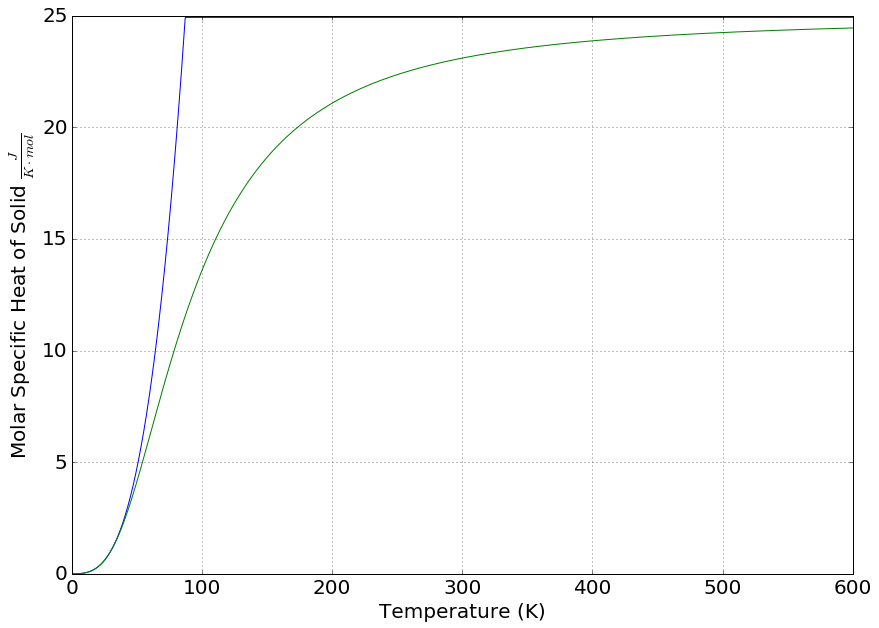

In [4]:
debyeTemperature = 373
temperatureRange= np.arange(0.5,600,0.1)
specificHeatRangeModelOne= [specificHeatModelOne(temperature, debyeTemperature) for temperature in temperatureRange]
specificHeatRangeModelTwo= [specificHeatModelTwo(temperature, debyeTemperature) for temperature in temperatureRange]
plt.plot(temperatureRange, specificHeatRangeModelOne)
plt.plot(temperatureRange, specificHeatRangeModelTwo)
plt.xlabel('Temperature (K)')
plt.ylabel(r'Molar Specific Heat of Solid $\frac{J}{K\cdot mol}$')
plt.grid()
plt.savefig("molarSpecificHeat")
plt.show()

# Numerical integration

Many integrals are analytically intractable, and must be performed numerically.  Here, we show how Python can be used to numerically integrate symbolic functions and non-symbolic functions, which correspond to an array of values defined with respect to a grid.

## Riemann sum

The approach is to discretize the x-array and find the y-values associated with each x value. Using a trapezoidal rule, an approximation to the integral can be obtained.

In [5]:
debyeTemperature = 373

# define two numerical arrays
temperatureRange= np.arange(1,273,0.1)
specificHeatRangeModelOne= [specificHeatModelOne(temperature, debyeTemperature) for temperature in temperatureRange]
specificHeatRangeModelTwo= [specificHeatModelTwo(temperature, debyeTemperature) for temperature in temperatureRange]

# sum the result using the trapeizodal rule
# note that the vertical array must come first, and the horizontal array is the second one
resultModelOne= spi.trapz(specificHeatRangeModelOne, temperatureRange)
resultModelTwo= spi.trapz(specificHeatRangeModelTwo, temperatureRange)

print ('Riemann sum')
print('molar specific Heat: model 1',resultModelOne,' molar specific heat', resultModelTwo)

Riemann sum
molar specific Heat: model 1 5170.61107273  molar specific heat 3938.13773534


/home/nbuser/anaconda3_410/lib/python3.5/site-packages/ipykernel/__main__.py:14: RuntimeWarning: overflow encountered in double_scalars


## Quadrature

The syntax for the `quad` function is simple; input the function, the lower limit, and the upper limit. Note that $\infty$ exists in the `numpy` library as `numpy.inf`.

In [6]:

# integrate specificHeat from T=1 to T=300 with a debye temperature of 250
resultModelOne =spi.quad(specificHeatModelOne,1,273,args=373,epsrel=1e-8)
resultModelTwo =spi.quad(specificHeatModelTwo,1,273,args=373,epsrel=1e-8)


print ('Quadrature')
print('molar specific Heat: model 1', resultModelOne,' molar specific heat: model 2', resultModelTwo)

Quadrature
molar specific Heat: model 1 (5173.104191539912, 4.22695350459773e-05)  molar specific heat: model 2 (3940.4126198507797, 7.767570631184335e-07)


The `quad` function outputs what's known as a "tuple" in Python.  It's like an array, but you can't manipulate it.  The first element is the value of the integral, and the second element is the relative error.  The `epsrel` parameter controls the error.  If you make `epsrel` larger, you will see the relative error go up.

We see that the result for model 2 is the same with the rieman sum and quadrature (within errors)



In [7]:

molarMassCopper =63.5 # grams per mol
resultModelTwo[0]*1000/molarMassCopper

62053.74204489417